In [1]:
# Start writing code here...

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
!pip install mlxtend==0.21.0
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVC
from sklearn.compose import make_column_transformer
from sklearn.metrics import confusion_matrix,roc_curve,roc_auc_score,accuracy_score, plot_confusion_matrix,classification_report

2023-01-12 21:12:37.761173: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-12 21:12:37.973792: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-01-12 21:12:37.978737: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-12 21:12:37.978754: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [3]:
data= pd.read_table("CHEMBL321_Desc_NormDimRed_300nm.csv",sep=',' )

In [4]:
data.head()

,Molecule ChEMBL ID,Standard Type,Standard Value,Standard Units,Activity,Smiles,SlogP,NumAmideBonds,NumHeteroAtoms,NumStereocenters,...,peoe_VSA5,peoe_VSA6,peoe_VSA7,peoe_VSA8,peoe_VSA9,peoe_VSA10,peoe_VSA11,peoe_VSA12,peoe_VSA13,peoe_VSA14
0,CHEMBL100081,IC50,7.0,nM,1,COc1ccc(S(=O)(=O)N(Cc2ccc(OCCN3CCCCC3)cc2)c2c(...,0.584622,0.1,0.285714,0.000000,...,0.0,0.187802,0.606228,0.070457,0.228434,0.155066,0.0,0.00000,0.3371,0.0
1,CHEMBL100134,IC50,14.0,nM,1,CCN(CC)CC#CCN(c1c(C)cc(Br)cc1C(=O)NO)S(=O)(=O)...,0.517425,0.1,0.285714,0.000000,...,0.0,0.254707,0.434616,0.048151,0.278602,0.049241,0.0,0.00000,0.3371,0.0
2,CHEMBL100146,IC50,18.0,nM,1,COc1ccc(S(=O)(=O)N2Cc3ccccc3N(C(=O)CCc3ccccc3)...,0.469259,0.2,0.285714,0.071429,...,0.0,0.297013,0.335768,0.200807,0.142193,0.100986,0.0,0.26968,0.1250,0.0
3,CHEMBL100280,IC50,5.0,nM,1,COc1ccc(S(=O)(=O)N(C)c2c(CN3CCOCC3)cccc2C(=O)N...,0.380244,0.1,0.285714,0.000000,...,0.0,0.074253,0.251725,0.287242,0.279555,0.049241,0.0,0.00000,0.3371,0.0
4,CHEMBL100512,IC50,1.0,nM,1,COc1ccc(S(=O)(=O)N(C)c2c(CN3CCN(C)CC3)cccc2C(=...,0.374291,0.1,0.285714,0.000000,...,0.0,0.074253,0.301149,0.428156,0.178267,0.049241,0.0,0.00000,0.3371,0.0


In [5]:
data.shape

(2355, 44)

In [6]:
data.axes

[RangeIndex(start=0, stop=2355, step=1),
 Index(['Molecule ChEMBL ID', 'Standard Type', 'Standard Value',
        'Standard Units', 'Activity', 'Smiles', 'SlogP', 'NumAmideBonds',
        'NumHeteroAtoms', 'NumStereocenters', 'NumUnspecifiedStereocenters',
        'NumRings', 'NumAromaticRings', 'NumSaturatedRings',
        'NumAromaticHeterocycles', 'NumSaturatedCarbocycles', 'FractionCSP3',
        'HallKierAlpha', 'kappa1', 'slogp_VSA1', 'slogp_VSA2', 'slogp_VSA3',
        'slogp_VSA4', 'slogp_VSA5', 'slogp_VSA7', 'slogp_VSA8', 'slogp_VSA10',
        'slogp_VSA12', 'smr_VSA3', 'smr_VSA4', 'smr_VSA6', 'smr_VSA10',
        'peoe_VSA3', 'peoe_VSA4', 'peoe_VSA5', 'peoe_VSA6', 'peoe_VSA7',
        'peoe_VSA8', 'peoe_VSA9', 'peoe_VSA10', 'peoe_VSA11', 'peoe_VSA12',
        'peoe_VSA13', 'peoe_VSA14'],
       dtype='object')]

In [7]:
data.drop(['Standard Type', 'Standard Units'], axis=1)

,Molecule ChEMBL ID,Standard Value,Activity,Smiles,SlogP,NumAmideBonds,NumHeteroAtoms,NumStereocenters,NumUnspecifiedStereocenters,NumRings,...,peoe_VSA5,peoe_VSA6,peoe_VSA7,peoe_VSA8,peoe_VSA9,peoe_VSA10,peoe_VSA11,peoe_VSA12,peoe_VSA13,peoe_VSA14
0,CHEMBL100081,7.0,1,COc1ccc(S(=O)(=O)N(Cc2ccc(OCCN3CCCCC3)cc2)c2c(...,0.584622,0.1,0.285714,0.000000,0.000000,0.266667,...,0.0,0.187802,0.606228,0.070457,0.228434,0.155066,0.000000,0.000000,0.3371,0.0
1,CHEMBL100134,14.0,1,CCN(CC)CC#CCN(c1c(C)cc(Br)cc1C(=O)NO)S(=O)(=O)...,0.517425,0.1,0.285714,0.000000,0.000000,0.133333,...,0.0,0.254707,0.434616,0.048151,0.278602,0.049241,0.000000,0.000000,0.3371,0.0
2,CHEMBL100146,18.0,1,COc1ccc(S(=O)(=O)N2Cc3ccccc3N(C(=O)CCc3ccccc3)...,0.469259,0.2,0.285714,0.071429,0.333333,0.266667,...,0.0,0.297013,0.335768,0.200807,0.142193,0.100986,0.000000,0.269680,0.1250,0.0
3,CHEMBL100280,5.0,1,COc1ccc(S(=O)(=O)N(C)c2c(CN3CCOCC3)cccc2C(=O)N...,0.380244,0.1,0.285714,0.000000,0.000000,0.200000,...,0.0,0.074253,0.251725,0.287242,0.279555,0.049241,0.000000,0.000000,0.3371,0.0
4,CHEMBL100512,1.0,1,COc1ccc(S(=O)(=O)N(C)c2c(CN3CCN(C)CC3)cccc2C(=...,0.374291,0.1,0.285714,0.000000,0.000000,0.200000,...,0.0,0.074253,0.301149,0.428156,0.178267,0.049241,0.000000,0.000000,0.3371,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2350,CHEMBL99045,53000.0,0,Cc1cc(COc2ccc(S(=O)(=O)CC(C=C3CCOCC3)N(O)C=O)c...,0.547141,0.1,0.250000,0.071429,0.333333,0.266667,...,0.0,0.182673,0.393862,0.179175,0.271512,0.105825,0.120097,0.108514,0.0000,0.0
2351,CHEMBL99072,1.4,1,COc1ccc(S(=O)(=O)N2Cc3ccccc3N(C(C)=O)CC2C(=O)N...,0.356032,0.2,0.285714,0.071429,0.333333,0.200000,...,0.0,0.111380,0.251725,0.206221,0.142193,0.100986,0.000000,0.269680,0.1250,0.0
2352,CHEMBL99365,53000.0,0,Cc1cc(COc2ccc(S(=O)(=O)CC(CC3CCC(=O)CC3)N(O)C=...,0.576106,0.1,0.250000,0.071429,0.333333,0.266667,...,0.0,0.111380,0.480391,0.317421,0.170224,0.155355,0.120097,0.108514,0.0000,0.0
2353,CHEMBL99745,2.0,1,COc1ccc(S(=O)(=O)N(Cc2ccc(OCCN3CCCCC3)cc2)c2c(...,0.638150,0.1,0.321429,0.000000,0.000000,0.266667,...,0.0,0.211041,0.648770,0.118608,0.228434,0.155066,0.000000,0.000000,0.3371,0.0


In [8]:
data.head()

,Molecule ChEMBL ID,Standard Type,Standard Value,Standard Units,Activity,Smiles,SlogP,NumAmideBonds,NumHeteroAtoms,NumStereocenters,...,peoe_VSA5,peoe_VSA6,peoe_VSA7,peoe_VSA8,peoe_VSA9,peoe_VSA10,peoe_VSA11,peoe_VSA12,peoe_VSA13,peoe_VSA14
0,CHEMBL100081,IC50,7.0,nM,1,COc1ccc(S(=O)(=O)N(Cc2ccc(OCCN3CCCCC3)cc2)c2c(...,0.584622,0.1,0.285714,0.000000,...,0.0,0.187802,0.606228,0.070457,0.228434,0.155066,0.0,0.00000,0.3371,0.0
1,CHEMBL100134,IC50,14.0,nM,1,CCN(CC)CC#CCN(c1c(C)cc(Br)cc1C(=O)NO)S(=O)(=O)...,0.517425,0.1,0.285714,0.000000,...,0.0,0.254707,0.434616,0.048151,0.278602,0.049241,0.0,0.00000,0.3371,0.0
2,CHEMBL100146,IC50,18.0,nM,1,COc1ccc(S(=O)(=O)N2Cc3ccccc3N(C(=O)CCc3ccccc3)...,0.469259,0.2,0.285714,0.071429,...,0.0,0.297013,0.335768,0.200807,0.142193,0.100986,0.0,0.26968,0.1250,0.0
3,CHEMBL100280,IC50,5.0,nM,1,COc1ccc(S(=O)(=O)N(C)c2c(CN3CCOCC3)cccc2C(=O)N...,0.380244,0.1,0.285714,0.000000,...,0.0,0.074253,0.251725,0.287242,0.279555,0.049241,0.0,0.00000,0.3371,0.0
4,CHEMBL100512,IC50,1.0,nM,1,COc1ccc(S(=O)(=O)N(C)c2c(CN3CCN(C)CC3)cccc2C(=...,0.374291,0.1,0.285714,0.000000,...,0.0,0.074253,0.301149,0.428156,0.178267,0.049241,0.0,0.00000,0.3371,0.0


In [9]:
data.describe()

,Standard Value,Activity,SlogP,NumAmideBonds,NumHeteroAtoms,NumStereocenters,NumUnspecifiedStereocenters,NumRings,NumAromaticRings,NumSaturatedRings,...,peoe_VSA5,peoe_VSA6,peoe_VSA7,peoe_VSA8,peoe_VSA9,peoe_VSA10,peoe_VSA11,peoe_VSA12,peoe_VSA13,peoe_VSA14
count,2355.000000,2355.000000,2355.000000,2355.000000,2355.000000,2355.000000,2355.000000,2355.000000,2355.000000,2355.000000,...,2355.000000,2355.000000,2355.000000,2355.000000,2355.000000,2355.000000,2355.000000,2355.000000,2355.000000,2355.000000
mean,15908.889309,0.512102,0.476335,0.152739,0.252002,0.070974,0.072895,0.208832,0.239193,0.084440,...,0.059064,0.198072,0.331372,0.195325,0.100232,0.094885,0.043549,0.127964,0.125467,0.099220
std,52027.180060,0.499960,0.112428,0.142603,0.111918,0.088024,0.144174,0.091110,0.111170,0.124476,...,0.130371,0.142171,0.131622,0.147101,0.086535,0.072810,0.077886,0.114051,0.126577,0.143812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.850000,0.000000,0.404036,0.100000,0.178571,0.000000,0.000000,0.133333,0.200000,0.000000,...,0.000000,0.108125,0.251725,0.070457,0.038526,0.049241,0.000000,0.000000,0.000000,0.000000
50%,230.000000,1.000000,0.472313,0.100000,0.250000,0.071429,0.000000,0.200000,0.200000,0.000000,...,0.000000,0.185633,0.333570,0.181574,0.088959,0.098482,0.000000,0.100000,0.125000,0.000000
75%,7850.000000,1.000000,0.536990,0.200000,0.321429,0.071429,0.000000,0.266667,0.300000,0.142857,...,0.000000,0.270380,0.405887,0.272561,0.137861,0.146452,0.070604,0.169680,0.212100,0.200000
max,1000000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
data.columns[data.isna().any()]

Index([], dtype='object')

In [12]:
data.isnull().any()

Molecule ChEMBL ID             False
Standard Type                  False
Standard Value                 False
Standard Units                 False
Activity                       False
Smiles                         False
SlogP                          False
NumAmideBonds                  False
NumHeteroAtoms                 False
NumStereocenters               False
NumUnspecifiedStereocenters    False
NumRings                       False
NumAromaticRings               False
NumSaturatedRings              False
NumAromaticHeterocycles        False
NumSaturatedCarbocycles        False
FractionCSP3                   False
HallKierAlpha                  False
kappa1                         False
slogp_VSA1                     False
slogp_VSA2                     False
slogp_VSA3                     False
slogp_VSA4                     False
slogp_VSA5                     False
slogp_VSA7                     False
slogp_VSA8                     False
slogp_VSA10                    False
s

array([[<AxesSubplot: title={'center': 'Standard Value'}>,
        <AxesSubplot: title={'center': 'Activity'}>,
        <AxesSubplot: title={'center': 'SlogP'}>,
        <AxesSubplot: title={'center': 'NumAmideBonds'}>,
        <AxesSubplot: title={'center': 'NumHeteroAtoms'}>,
        <AxesSubplot: title={'center': 'NumStereocenters'}>],
       [<AxesSubplot: title={'center': 'NumUnspecifiedStereocenters'}>,
        <AxesSubplot: title={'center': 'NumRings'}>,
        <AxesSubplot: title={'center': 'NumAromaticRings'}>,
        <AxesSubplot: title={'center': 'NumSaturatedRings'}>,
        <AxesSubplot: title={'center': 'NumAromaticHeterocycles'}>,
        <AxesSubplot: title={'center': 'NumSaturatedCarbocycles'}>],
       [<AxesSubplot: title={'center': 'FractionCSP3'}>,
        <AxesSubplot: title={'center': 'HallKierAlpha'}>,
        <AxesSubplot: title={'center': 'kappa1'}>,
        <AxesSubplot: title={'center': 'slogp_VSA1'}>,
        <AxesSubplot: title={'center': 'slogp_VSA2'}>

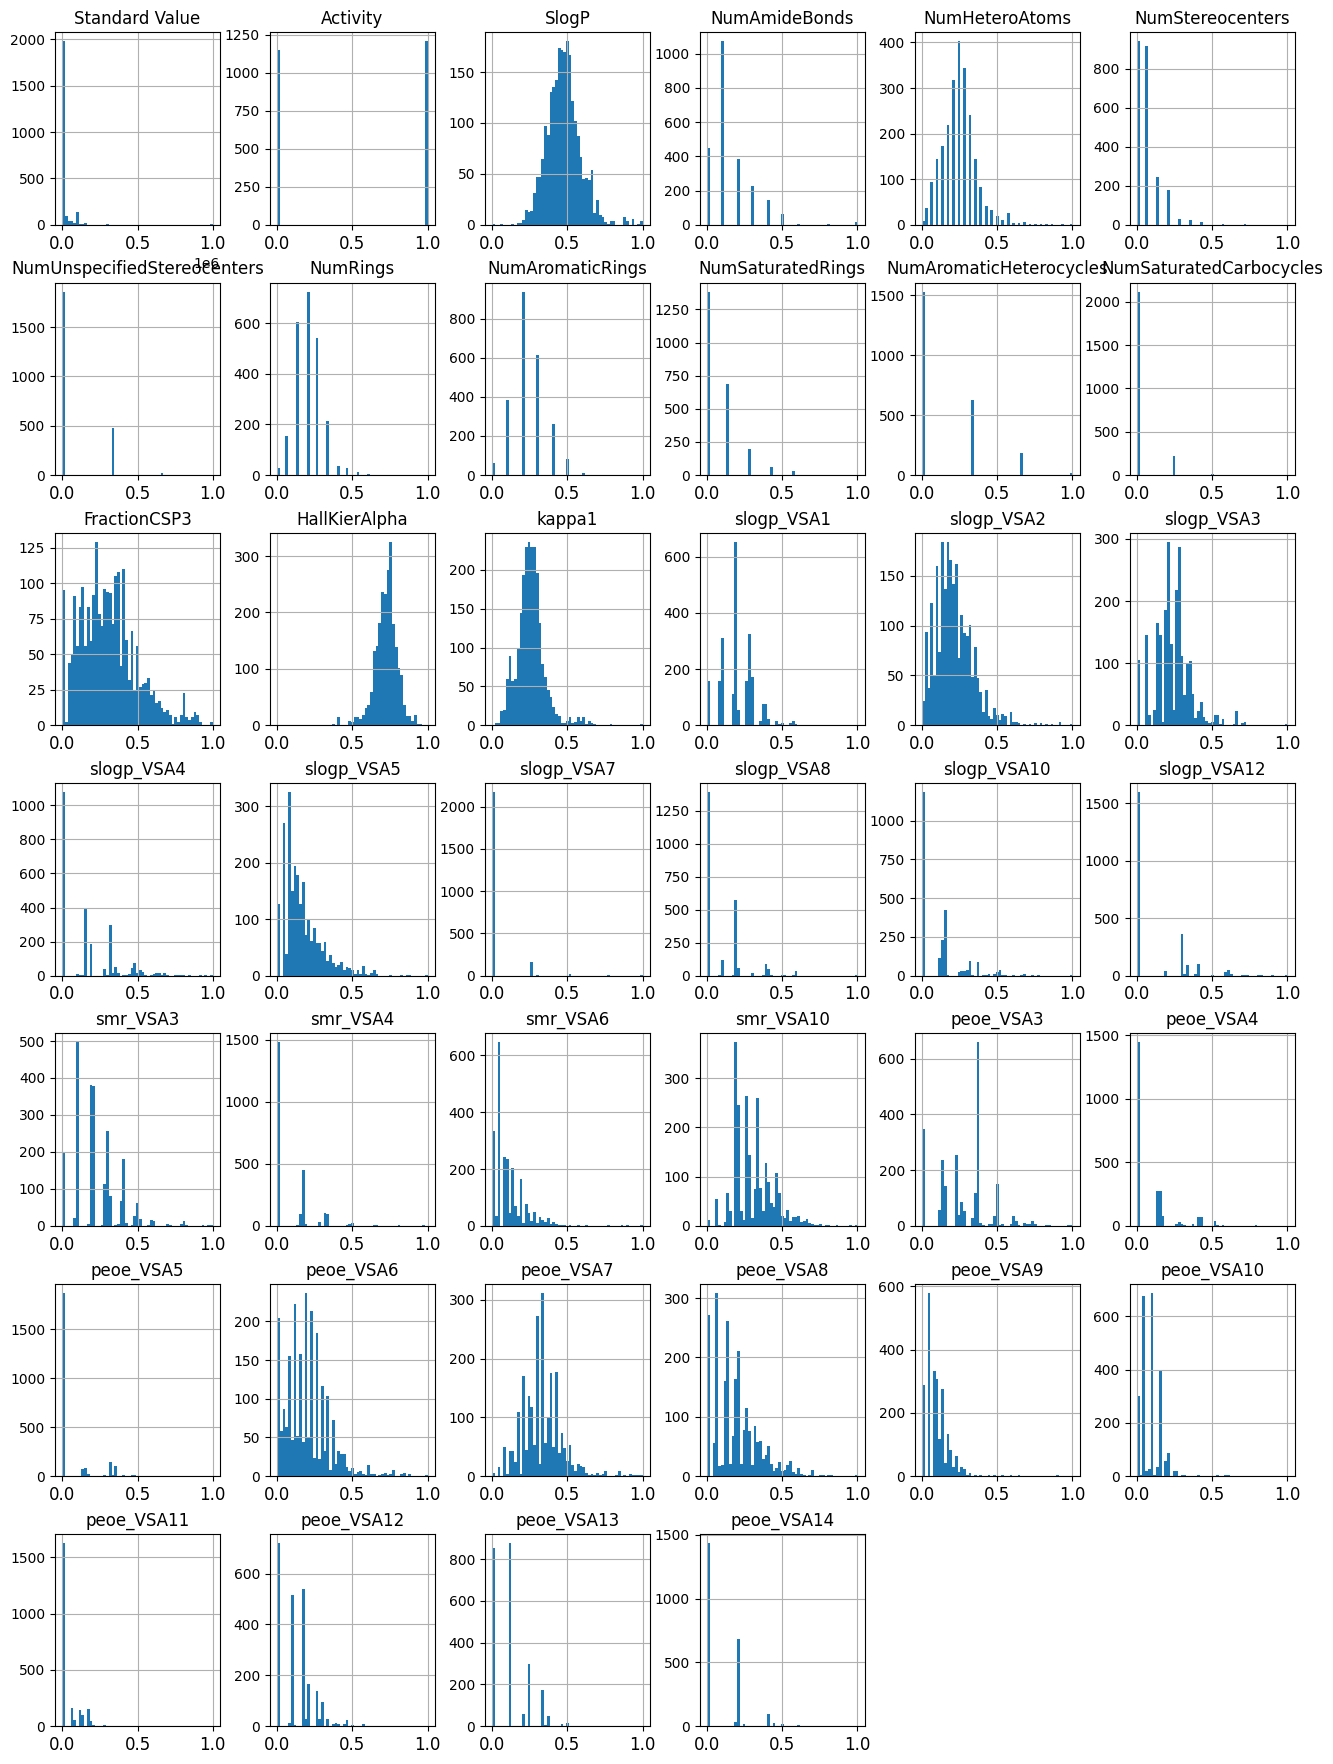

In [14]:
data.hist(figsize=(16, 22), bins=55, xlabelsize=12, ylabelsize=10)

In [15]:
cor_matrix = data.corr(method= 'pearson').abs()
print(cor_matrix)

                             Standard Value  Activity     SlogP  \
Standard Value                     1.000000  0.312583  0.017675   
Activity                           0.312583  1.000000  0.100084   
SlogP                              0.017675  0.100084  1.000000   
NumAmideBonds                      0.130102  0.227593  0.071543   
NumHeteroAtoms                     0.190519  0.270982  0.095859   
NumStereocenters                   0.031072  0.024352  0.018575   
NumUnspecifiedStereocenters        0.065226  0.110537  0.011127   
NumRings                           0.066414  0.065142  0.541570   
NumAromaticRings                   0.029887  0.060893  0.675374   
NumSaturatedRings                  0.069985  0.003750  0.104872   
NumAromaticHeterocycles            0.062873  0.166588  0.116824   
NumSaturatedCarbocycles            0.065410  0.121072  0.132652   
FractionCSP3                       0.052278  0.061706  0.322788   
HallKierAlpha                      0.132221  0.084681  0.44434

In [16]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

                             Standard Value  Activity     SlogP  \
Standard Value                          NaN  0.312583  0.017675   
Activity                                NaN       NaN  0.100084   
SlogP                                   NaN       NaN       NaN   
NumAmideBonds                           NaN       NaN       NaN   
NumHeteroAtoms                          NaN       NaN       NaN   
NumStereocenters                        NaN       NaN       NaN   
NumUnspecifiedStereocenters             NaN       NaN       NaN   
NumRings                                NaN       NaN       NaN   
NumAromaticRings                        NaN       NaN       NaN   
NumSaturatedRings                       NaN       NaN       NaN   
NumAromaticHeterocycles                 NaN       NaN       NaN   
NumSaturatedCarbocycles                 NaN       NaN       NaN   
FractionCSP3                            NaN       NaN       NaN   
HallKierAlpha                           NaN       NaN       Na

In [17]:
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy.
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

tidy_corr_matrix(cor_matrix).head(2)

,variable_1,variable_2,r,abs_r
564,kappa1,NumHeteroAtoms,0.799849,0.799849
174,NumHeteroAtoms,kappa1,0.799849,0.799849


In [18]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.80)]

print(to_drop)

[]


<AxesSubplot: xlabel='Activity', ylabel='count'>

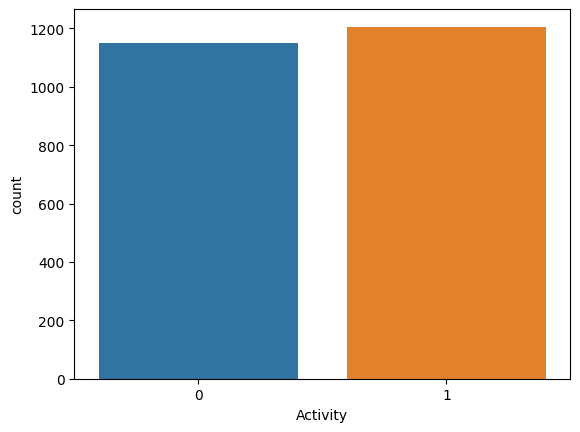

In [20]:
sns.countplot(x=data["Activity"])

# NORMALIZACION

In [21]:
data_pre=data.drop(['Molecule ChEMBL ID','Standard Type',
 'Standard Units','Smiles'], axis=1)

In [22]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn import preprocessing

col_names = list(data.columns)


In [23]:
df_std = preprocessing.StandardScaler().fit_transform(data_pre)
df_minmax = preprocessing.MinMaxScaler().fit_transform(data_pre)

X_df = pd.DataFrame(df_minmax)   
#X_df.head(10), columns=col_names

In [24]:
col_names


['Molecule ChEMBL ID',
 'Standard Type',
 'Standard Value',
 'Standard Units',
 'Activity',
 'Smiles',
 'SlogP',
 'NumAmideBonds',
 'NumHeteroAtoms',
 'NumStereocenters',
 'NumUnspecifiedStereocenters',
 'NumRings',
 'NumAromaticRings',
 'NumSaturatedRings',
 'NumAromaticHeterocycles',
 'NumSaturatedCarbocycles',
 'FractionCSP3',
 'HallKierAlpha',
 'kappa1',
 'slogp_VSA1',
 'slogp_VSA2',
 'slogp_VSA3',
 'slogp_VSA4',
 'slogp_VSA5',
 'slogp_VSA7',
 'slogp_VSA8',
 'slogp_VSA10',
 'slogp_VSA12',
 'smr_VSA3',
 'smr_VSA4',
 'smr_VSA6',
 'smr_VSA10',
 'peoe_VSA3',
 'peoe_VSA4',
 'peoe_VSA5',
 'peoe_VSA6',
 'peoe_VSA7',
 'peoe_VSA8',
 'peoe_VSA9',
 'peoe_VSA10',
 'peoe_VSA11',
 'peoe_VSA12',
 'peoe_VSA13',
 'peoe_VSA14']

# Procesamiento de Datos

In [25]:
X_predict=data_pre.drop(['Standard Value', 'Activity'], axis=1)
y_respuesta=data_pre['Activity']
X_predict.head()

,SlogP,NumAmideBonds,NumHeteroAtoms,NumStereocenters,NumUnspecifiedStereocenters,NumRings,NumAromaticRings,NumSaturatedRings,NumAromaticHeterocycles,NumSaturatedCarbocycles,...,peoe_VSA5,peoe_VSA6,peoe_VSA7,peoe_VSA8,peoe_VSA9,peoe_VSA10,peoe_VSA11,peoe_VSA12,peoe_VSA13,peoe_VSA14
0,0.584622,0.1,0.285714,0.000000,0.000000,0.266667,0.3,0.142857,0.0,0.0,...,0.0,0.187802,0.606228,0.070457,0.228434,0.155066,0.0,0.00000,0.3371,0.0
1,0.517425,0.1,0.285714,0.000000,0.000000,0.133333,0.2,0.000000,0.0,0.0,...,0.0,0.254707,0.434616,0.048151,0.278602,0.049241,0.0,0.00000,0.3371,0.0
2,0.469259,0.2,0.285714,0.071429,0.333333,0.266667,0.3,0.000000,0.0,0.0,...,0.0,0.297013,0.335768,0.200807,0.142193,0.100986,0.0,0.26968,0.1250,0.0
3,0.380244,0.1,0.285714,0.000000,0.000000,0.200000,0.2,0.142857,0.0,0.0,...,0.0,0.074253,0.251725,0.287242,0.279555,0.049241,0.0,0.00000,0.3371,0.0
4,0.374291,0.1,0.285714,0.000000,0.000000,0.200000,0.2,0.142857,0.0,0.0,...,0.0,0.074253,0.301149,0.428156,0.178267,0.049241,0.0,0.00000,0.3371,0.0


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_predict,y_respuesta,test_size=0.20,random_state=109)

In [27]:
from sklearn import svm

#Create a svm Classifier
model_1 = SVC(C=1, kernel='poly', gamma=1).fit(X_train, y_train) # Linear Kernel

#Train the model using the training sets
model_1.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model_1.predict(X_test)

In [28]:
from sklearn import svm

#Create a svm Classifier
model_2 = SVC(C=0.8, kernel='rbf', gamma=1).fit(X_train, y_train) # Linear Kernel

#Train the model using the training sets
model_2.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_ = model_2.predict(X_test)

In [29]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8535031847133758


In [30]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.8333333333333334
Recall: 0.914396887159533


/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


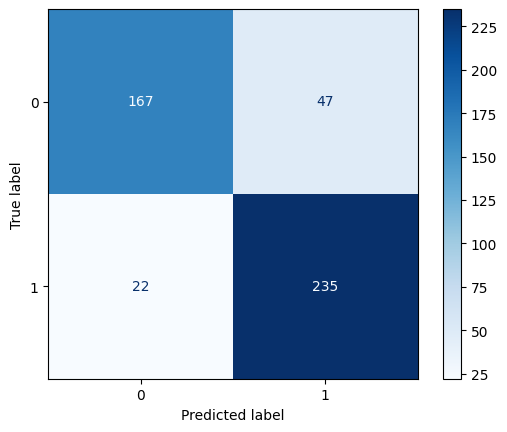

In [31]:
y_test_hat=model_1.predict(X_test)
confusion_matrix(y_test,y_test_hat)
disp=plot_confusion_matrix(model_1, X_test, y_test,cmap=plt.cm.Blues)

In [32]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

#selection of training and test data

X_train, X_test, y_train, y_test = train_test_split(X_predict,y_respuesta,test_size=0.20,random_state=109)


# MODELO LINEAR

In [33]:
from  sklearn.model_selection  import  GridSearchCV
from sklearn.svm import SVC
#Cree un clasificador svm y ajuste de hiperparámetros 
ml  = SVC() 
  
# parameter range definition

param_grid  =  { 'C' :  [  1 ,  10 ,  100 ,  1000 , 10000 ],  
               
              'kernel' :  [ 'linear' ]} 
  
grid  =  GridSearchCV ( ml ,  param_grid ,  refit  =  True ,  verbose=1 , cv = 15 )
  
#Train the model using the training sets
grid_search = grid .fit ( X_train ,  y_train )


Fitting 15 folds for each of 5 candidates, totalling 75 fits


In [34]:
print(grid_search.best_params_)

{'C': 10, 'kernel': 'linear'}


In [35]:

accuracy = grid_search.best_score_ *100
print("La precisión de nuestro conjunto de datos de entrenamiento con ajuste es: {:.2f}%".format(accuracy) )

La precisión de nuestro conjunto de datos de entrenamiento con ajuste es: 78.76%


In [36]:
y_linear = grid.predict ( X_test ) 
test_accuracy = accuracy_score ( y_test , y_test_hat ) * 100 
test_accuracy 
print ( "La precisión de nuestro conjunto de datos de prueba con ajuste es: {:.2f} %" . format ( test_accuracy )  )

La precisión de nuestro conjunto de datos de prueba con ajuste es: 85.35 %


/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


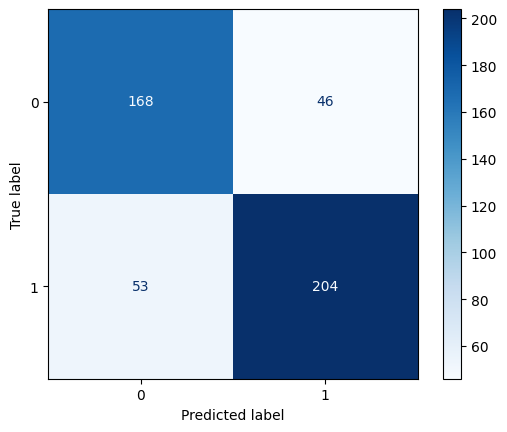

In [37]:
confusion_matrix(y_test,y_linear)
disp=plot_confusion_matrix(grid, X_test, y_test,cmap=plt.cm.Blues)

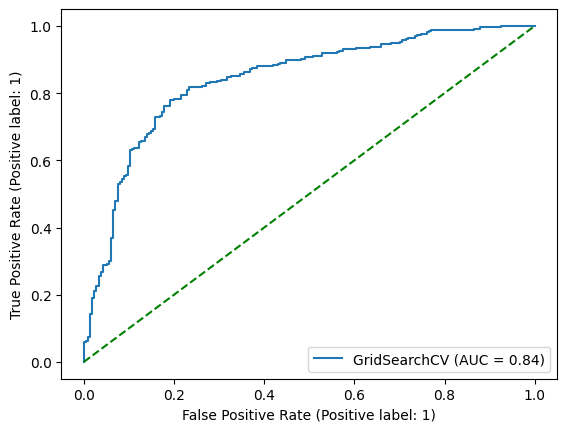

In [38]:
svc_grid = RocCurveDisplay.from_estimator(grid, X_test, y_test)
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.show()

# Modelo RBF

In [39]:
param_grid_rbf  =  { 'C' :  [  0.9 ,  10 ,  100 ,  1000 , 10000 ],  
              'gamma' :  [ 1 , 0.1 , 0.01 , 0.001 , 0.0001 ], 
              'kernel' :  [ 'rbf' ]} 

#parameter range definition

grid_rbf  =  GridSearchCV ( ml ,  param_grid_rbf ,  refit  =  True ,  verbose=1 , cv = 15 )
  
#Train the model using the training sets 
grid_search_rbf = grid_rbf .fit ( X_train ,  y_train )
#pred_RBF = grid_search_rbf.predict(X_test)

Fitting 15 folds for each of 25 candidates, totalling 375 fits


In [40]:
print(grid_search_rbf.best_params_)

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}


In [41]:
y_test_rbf= grid_rbf.predict ( X_test )
accuracy_rbf = grid_search_rbf.best_score_ *100
print("La precisión de nuestro conjunto de datos de entrenamiento con ajuste es : {:.2f}%".format(accuracy_rbf) )

La precisión de nuestro conjunto de datos de entrenamiento con ajuste es : 85.62%


In [42]:

test_accuracy_rbf = accuracy_score ( y_test , y_test_rbf ) * 100 
test_accuracy_rbf 
print ( "La precisión de nuestro conjunto de datos de prueba con ajuste es: {:.2f} %" . format ( test_accuracy_rbf )  )

La precisión de nuestro conjunto de datos de prueba con ajuste es: 85.35 %


/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


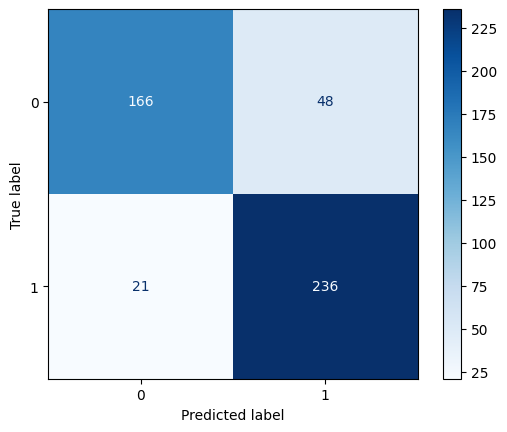

In [43]:
confusion_matrix(y_test,y_test_rbf)
disp_rbf=plot_confusion_matrix(grid_rbf, X_test, y_test,cmap=plt.cm.Blues)

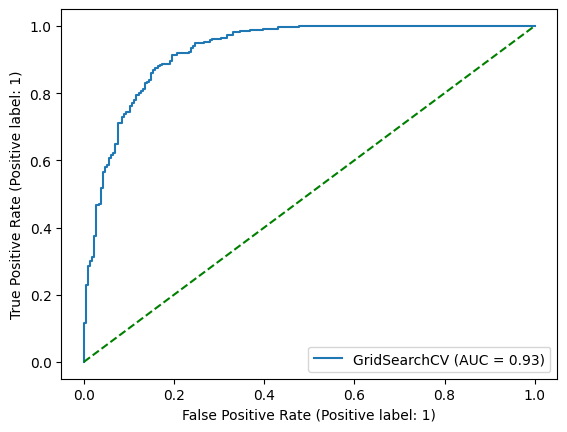

In [44]:
svc_grid_rbf = RocCurveDisplay.from_estimator(grid_rbf, X_test, y_test)
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.show()

# Modelo sigmoid

In [45]:
from  sklearn.model_selection  import  GridSearchCV
from sklearn.svm import SVC
ml  = SVC() 
  
param_grid_sigmoid  =  { 'C' :  [  1 ,  10 ,  100 ,  1000 , 10000 ],  
              'gamma' :  [ 1 , 0.1 , 0.01 , 0.001 , 0.0001 ], 
              'kernel' :  [ 'sigmoid' ]} 
  
grid_sigmoid  =  GridSearchCV ( ml ,  param_grid_sigmoid ,  refit  =  True ,  verbose=1 , cv = 15 )
  
#Train the model using the training sets 
grid_search_sigmoid = grid_sigmoid .fit ( X_train ,  y_train )


Fitting 15 folds for each of 25 candidates, totalling 375 fits


In [46]:

print(grid_search_sigmoid.best_params_)

{'C': 10000, 'gamma': 0.001, 'kernel': 'sigmoid'}


In [47]:
y_test_sigmoid= grid_sigmoid.predict ( X_test )
accuracy = grid_search_sigmoid.best_score_ *100
print("La precisión de nuestro conjunto de datos de entrenamiento con ajuste es: {:.2f}%".format(accuracy) )

La precisión de nuestro conjunto de datos de entrenamiento con ajuste es: 78.76%


In [48]:
test_accuracy_sigmoid = accuracy_score ( y_test , y_test_sigmoid ) * 100 
test_accuracy_sigmoid 
print ( "La precisión de nuestro conjunto de datos de prueba con ajuste es: {:.2f} %" . format ( test_accuracy_sigmoid )  )

La precisión de nuestro conjunto de datos de prueba con ajuste es: 78.98 %


/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


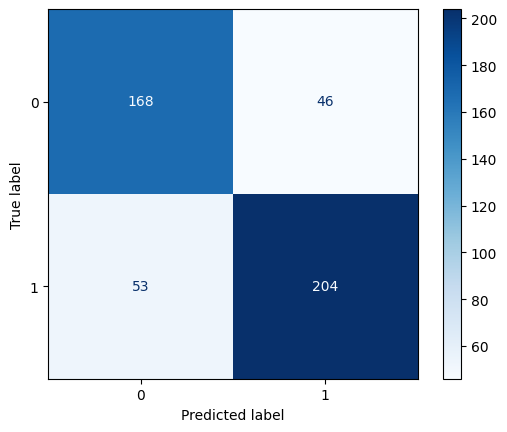

In [49]:
#confusion_matrix(y_test,y_test_sigmoid)
disp_sigmoid=plot_confusion_matrix(grid_sigmoid, X_test, y_test,cmap=plt.cm.Blues)

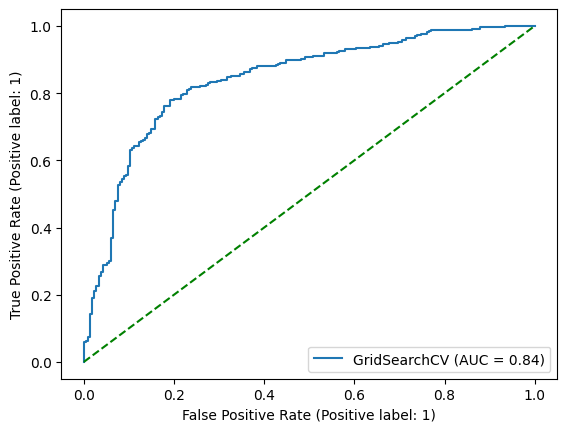

In [50]:
svc_grid_sigmoid = RocCurveDisplay.from_estimator(grid_sigmoid, X_test, y_test)
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.show()

In [51]:
y_pred_ = grid_sigmoid.predict(X_test)
fpr1 , tpr1, thresholds1 = roc_curve(y_test, y_pred_)
fpr1

array([0.        , 0.21495327, 1.        ])

# Modelo Poly

In [52]:
from  sklearn.model_selection  import  GridSearchCV
from sklearn.svm import SVC
ml  = SVC() 
  
param_grid_poly  =  { 'C' :  [  1 ,  10 ,  100 ,  1000 , 10000 ],  
              'gamma' :  [ 1 , 0.1 , 0.01 , 0.001 , 0.0001 ], 
              'kernel' :  [ 'poly' ]} 
  
grid_poly  =  GridSearchCV ( ml ,  param_grid_poly ,  refit  =  True ,  verbose=1 , cv = 15 )
  
#Train the model using the training sets 
grid_search_poly = grid_poly .fit ( X_train ,  y_train )


Fitting 15 folds for each of 25 candidates, totalling 375 fits


In [53]:
print(grid_search_poly.best_params_)

{'C': 1, 'gamma': 1, 'kernel': 'poly'}


In [54]:
y_test_poly= grid_poly.predict ( X_test )
accuracy_poly = grid_search_poly.best_score_ *100
print("La precisión de nuestro conjunto de datos de entrenamiento con ajuste es: {:.2f}%".format(accuracy_poly) )


La precisión de nuestro conjunto de datos de entrenamiento con ajuste es: 83.33%


In [55]:
test_accuracy_poly = accuracy_score ( y_test , y_test_poly ) * 100 
test_accuracy_poly 
print ( "La precisión de nuestro conjunto de datos de prueba con ajuste es: {:.2f} %" . format ( test_accuracy_poly )  )

La precisión de nuestro conjunto de datos de prueba con ajuste es: 85.35 %


/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


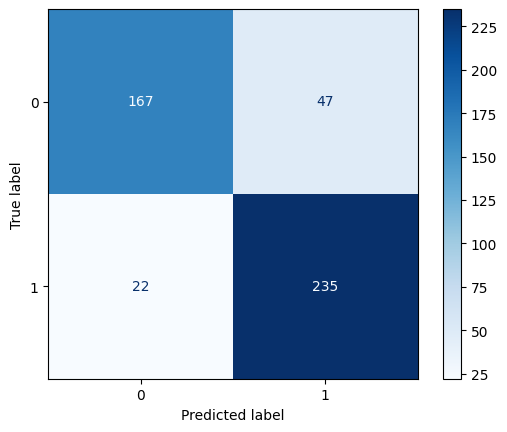

In [56]:
confusion_matrix(y_test,y_test_poly)
disp_poly=plot_confusion_matrix(grid_poly, X_test, y_test,cmap=plt.cm.Blues)

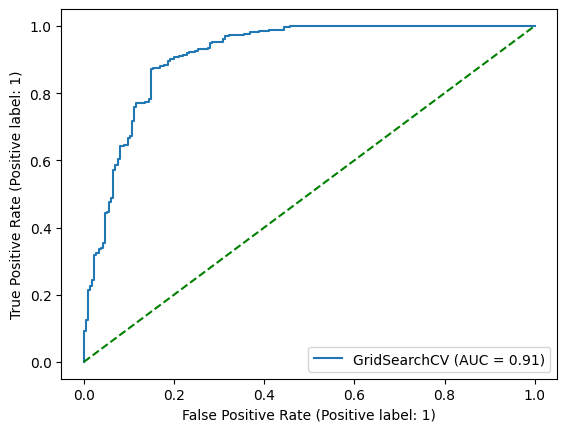

In [57]:
svc_grid_poly = RocCurveDisplay.from_estimator(grid_poly, X_test, y_test)
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.show()

# 

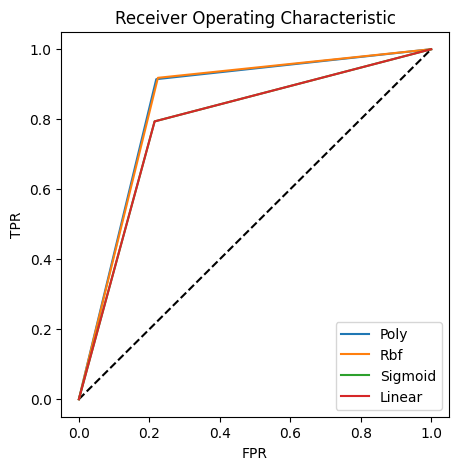

In [58]:
from sklearn.metrics import roc_curve, auc

svm_poly_fpr, svm_poly_tpr, threshold=roc_curve(y_test, y_test_poly)
auc_poly=auc(svm_poly_fpr, svm_poly_tpr)

svm_rbf_fpr, svm_rbf_tpr, threshold=roc_curve(y_test, y_test_rbf)
auc_rbf=auc(svm_rbf_fpr, svm_rbf_tpr)

svm_linear_fpr, svm_linear_tpr, threshold=roc_curve(y_test, y_linear)
auc_linear=auc(svm_linear_fpr, svm_linear_tpr)

svm_sigmoid_fpr, svm_sigmoid_tpr, threshold=roc_curve(y_test, y_test_sigmoid)
auc_sigmoid=auc(svm_sigmoid_fpr, svm_sigmoid_tpr)

plt.figure(figsize=(5,5),dpi=100)
plt.plot([0,1],[0,1], 'k--')
plt.plot(svm_poly_fpr, svm_poly_tpr, label= "Poly")
plt.plot(svm_rbf_fpr, svm_rbf_tpr, label= "Rbf")
plt.plot(svm_sigmoid_fpr, svm_sigmoid_tpr, label= "Sigmoid")
plt.plot(svm_linear_fpr, svm_linear_tpr, label= "Linear")
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()

In [59]:
data_2= pd.read_table("CHEMBL321_FDA_Test.csv",sep=',')

In [60]:
data_2_=pd.DataFrame(data_2)

In [61]:
df_2_drop=data_2.drop(['Molecule name'], axis=1)
data_=data_2['Molecule name']


In [62]:
data_2_

,Molecule name,SlogP,NumAmideBonds,NumHeteroAtoms,NumStereocenters,NumUnspecifiedStereocenters,NumRings,NumAromaticRings,NumSaturatedRings,NumAromaticHeterocycles,...,peoe_VSA5,peoe_VSA6,peoe_VSA7,peoe_VSA8,peoe_VSA9,peoe_VSA10,peoe_VSA11,peoe_VSA12,peoe_VSA13,peoe_VSA14
0,Flunixin meglumine.cdx,0.311505,0.0,0.392857,0.285714,0.000000,0.133333,0.2,0.000000,0.333333,...,0.000000,0.036980,0.305482,0.315676,0.265617,0.265781,0.017236,0.121141,0.030285,0.406935
1,Fluoxetine hydrochloride.cdx,0.588285,0.0,0.107143,0.071429,0.333333,0.133333,0.2,0.000000,0.000000,...,0.000000,0.184900,0.302992,0.171905,0.147719,0.113404,0.000000,0.000000,0.000000,0.206935
2,Fluticasone propionate.cdx,0.587934,0.0,0.250000,0.642857,0.000000,0.266667,0.0,0.428571,0.000000,...,0.000000,0.162841,0.429909,0.651504,0.120157,0.103684,0.208190,0.110822,0.000000,0.200000
3,Fluvoxamine maleate.cdx,0.501692,0.0,0.178571,0.000000,0.000000,0.066667,0.1,0.000000,0.000000,...,0.000000,0.105513,0.257839,0.334372,0.202009,0.080357,0.000000,0.000000,0.000000,0.206935
4,Fumagillin.cdx,0.551808,0.0,0.178571,0.428571,0.000000,0.200000,0.0,0.428571,0.000000,...,0.000000,0.293382,0.278228,0.442181,0.320687,0.200083,0.000000,0.000000,0.030285,0.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,retapamulin.cdx,0.645590,0.0,0.142857,0.785714,0.000000,0.333333,0.0,0.714286,0.000000,...,0.504355,0.204775,0.527095,1.009992,0.163888,0.101602,0.000000,0.024228,0.000000,0.200000
246,sertraline hydrochloride.cdx,0.640557,0.0,0.035714,0.142857,0.000000,0.200000,0.2,0.000000,0.000000,...,0.000000,0.326897,0.340097,0.246290,0.161059,0.012092,0.000000,0.000000,0.000000,0.000000
247,terfenadine.cdx,0.729445,0.0,0.035714,0.071429,0.333333,0.266667,0.3,0.142857,0.000000,...,0.000000,0.643523,0.550818,0.354163,0.204216,0.047970,0.000000,0.048456,0.000000,0.000000
248,triclabendazole.cdx,0.700768,0.0,0.178571,0.000000,0.000000,0.200000,0.3,0.000000,0.333333,...,0.000000,0.321959,0.170489,0.109319,0.214112,0.141498,0.080188,0.000000,0.000000,0.000000


In [66]:
prediction=grid_rbf.predict(df_2_drop)
prediccion_poly=grid_poly.predict(df_2_drop)

In [75]:
print(prediccion_poly)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [64]:
print(prediction)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [73]:
df_pred=pd.DataFrame()
df_pred['rbf']=prediction
df_pred['poly']=prediccion_poly
df_pred['moleculas']=data_
df_pred

,rbf,poly,moleculas
0,0,0,Flunixin meglumine.cdx
1,0,0,Fluoxetine hydrochloride.cdx
2,0,0,Fluticasone propionate.cdx
3,0,0,Fluvoxamine maleate.cdx
4,0,0,Fumagillin.cdx
...,...,...,...
245,0,0,retapamulin.cdx
246,0,0,sertraline hydrochloride.cdx
247,0,0,terfenadine.cdx
248,0,0,triclabendazole.cdx


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f7606623-ee57-48c7-9473-c7e8221a7960' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>